In [1]:
!pip install sklearn
!pip install seaborn

  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

In [3]:
def load_dataset():
    url = "boston.csv"
    dataset = pd.read_csv(url)
    return dataset

boston_dataframe = load_dataset()
boston_dataframe.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(f"{dataset.shape}\n")
    print("First 10 rows of dataset:")
    print(f"{dataset.head(10)}\n")
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(boston_dataframe)

Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

In [5]:
def clean_dataset(dataset):
    return dataset.dropna()
 
clean_dataset(boston_dataframe)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


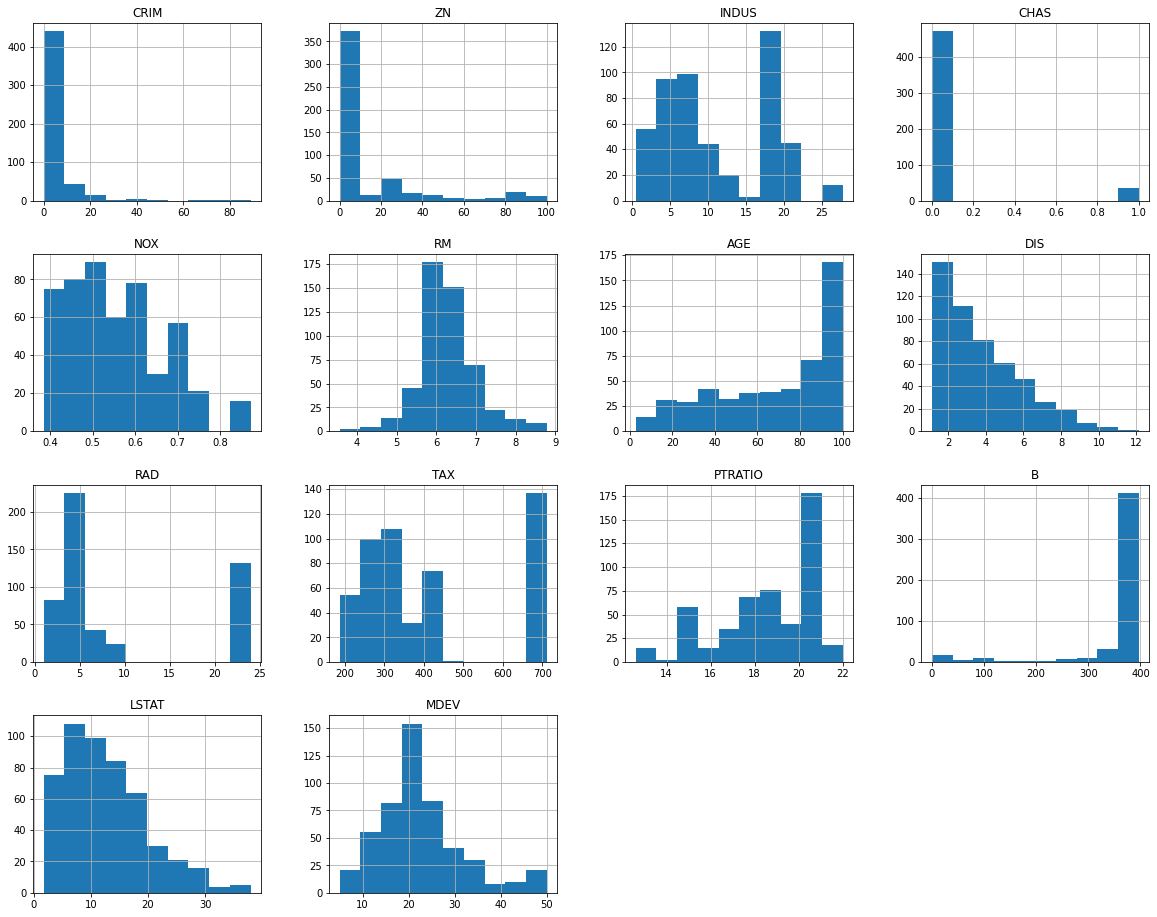

In [6]:
def print_histograms(dataset):
    dataset.hist(figsize = (20, 16))
    plt.show()

print_histograms(boston_dataframe)

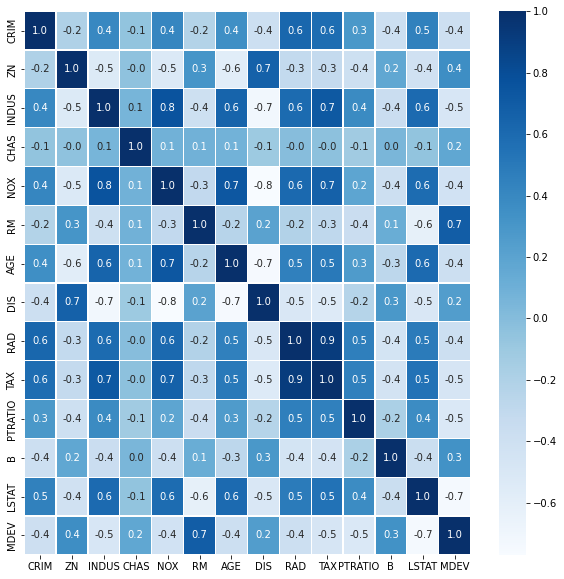

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


In [7]:
def compute_correlations_matrix(dataset):
    correlation = dataset.corr(method = 'pearson')
    plt.figure(figsize = (10,10))
    sns.heatmap(dataset.corr(), annot = True, cmap = 'Blues', fmt='.1f', linewidth = 0.2)
    plt.show()
    return correlation
  
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MDEV'])

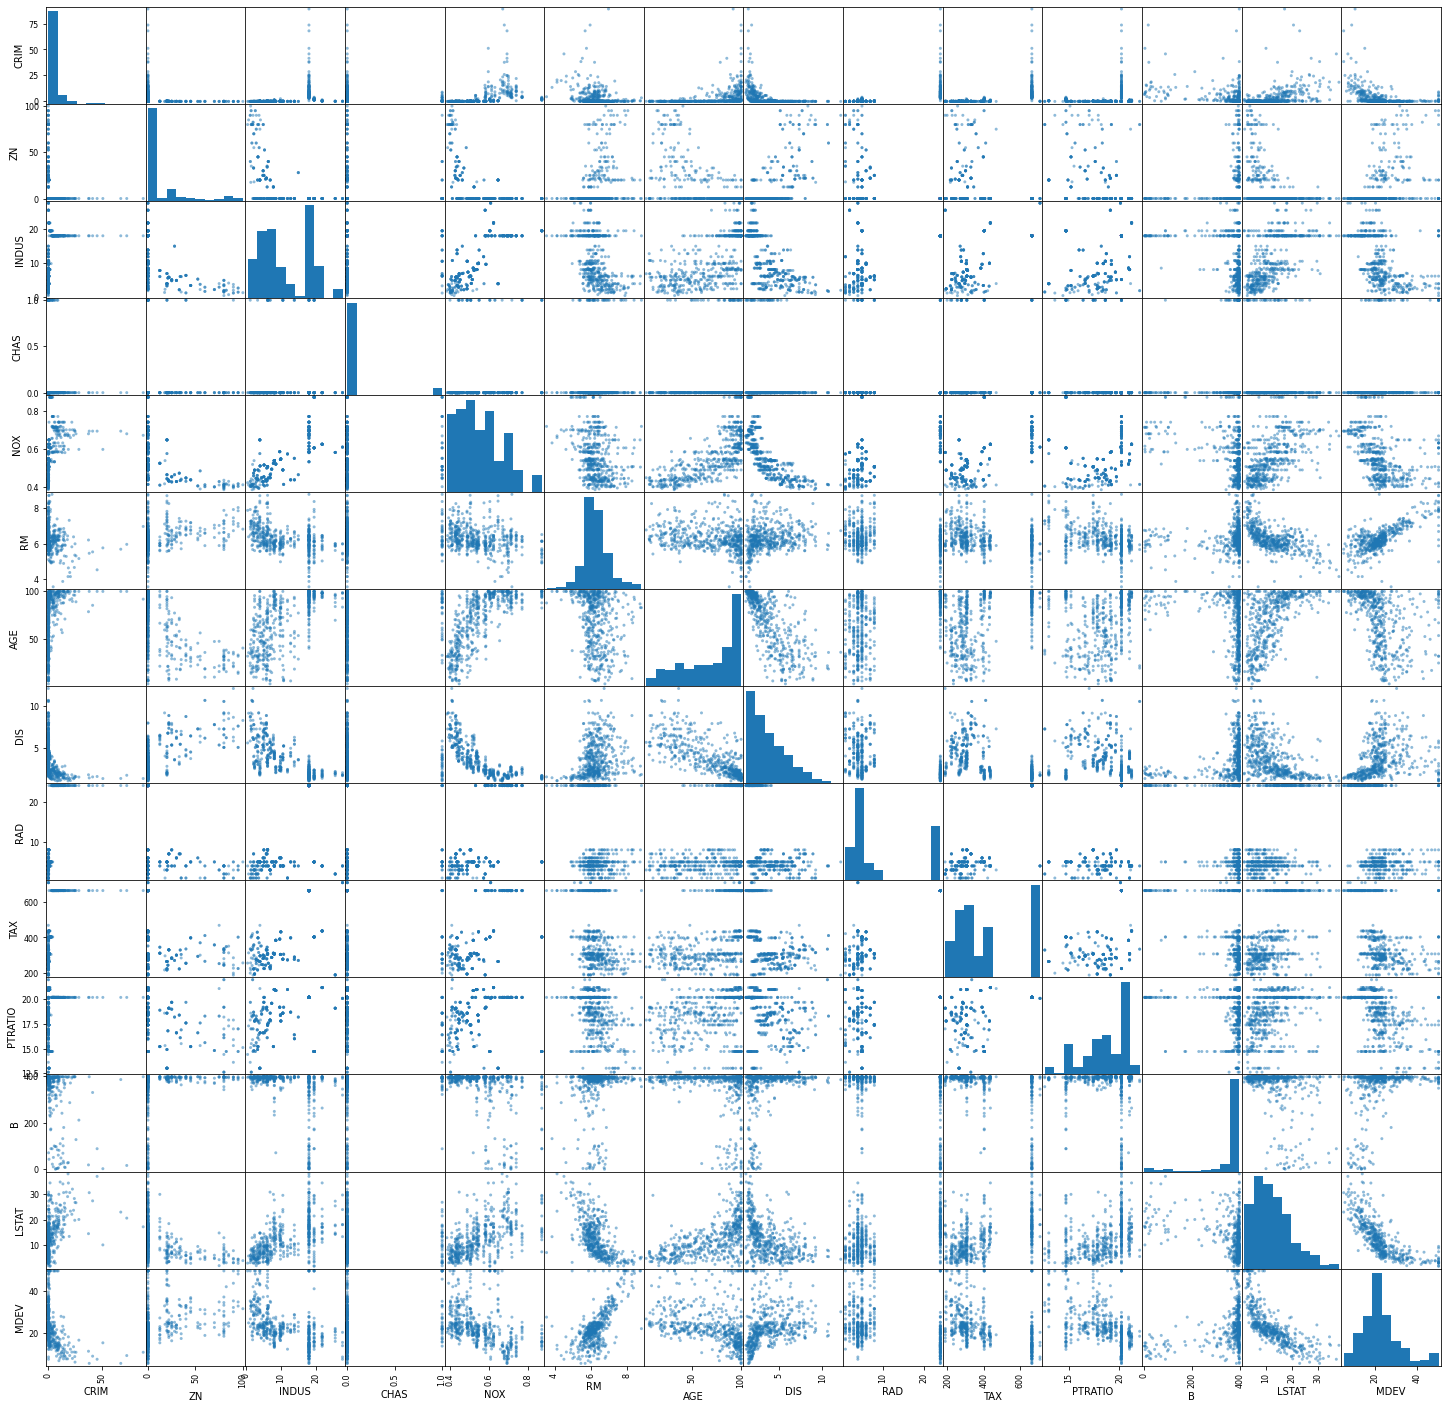

In [8]:
def print_scatter_matrix(dataset):
    scatter_matrix(dataset, figsize = (25, 25))
    pyplot.show()  

print_scatter_matrix(boston_dataframe)

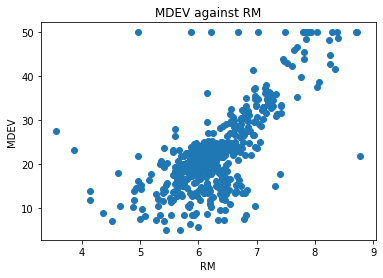

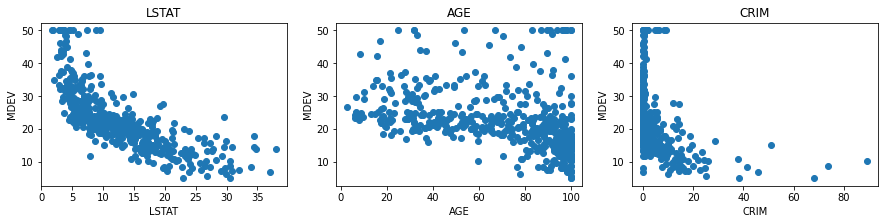

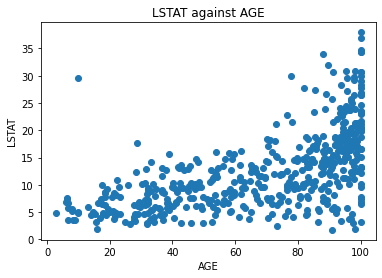

CRIM       0.452220
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MDEV      -0.737663
Name: LSTAT, dtype: float64


In [9]:
plt.scatter(x = boston_dataframe.RM, y = boston_dataframe.MDEV)
plt.gca().update(dict(title = 'MDEV against RM', xlabel='RM', ylabel='MDEV'))
fix, axis = plt.subplots(1,3, figsize = (15, 3))
axis[0].scatter(x = boston_dataframe.LSTAT, y = boston_dataframe.MDEV)
axis[1].scatter(x = boston_dataframe.AGE, y = boston_dataframe.MDEV)
axis[2].scatter(x = boston_dataframe.CRIM, y = boston_dataframe.MDEV)
axis[0].set_title('LSTAT')
axis[1].set_title('AGE')
axis[2].set_title('CRIM')
axis[0].set(xlabel='LSTAT', ylabel='MDEV')
axis[1].set(xlabel='AGE', ylabel='MDEV')
axis[2].set(xlabel='CRIM', ylabel='MDEV')
plt.figure()
plt.scatter(x = boston_dataframe.AGE, y = boston_dataframe.LSTAT)
plt.gca().update(dict(title = 'LSTAT against AGE', xlabel='AGE', ylabel='LSTAT'))
plt.show()
print(correlations['LSTAT'])

In [10]:
def boston_fit_model(dataset):
    # SELECT two columns from our 
    model_dataset = dataset[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2
    y = model_dataset.iloc[:, -1].values
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.25, random_state = 1)
    # Train the model
    regressor.fit(x_train, y_train)
    return regressor#, x_test, y_test

print(boston_fit_model(boston_dataframe))

LinearRegression()


In [11]:
#from sklearn.metrics import r2_score 
#import numpy as np

def boston_predict(estimator, array_to_predict):
    result = estimator.predict(array_to_predict)
    return result

# data = [1, 2, 3]
# np_array = np.array(data)
# data = np_array.reshape(-1, 1)
# estimator, x, y = boston_fit_model(boston_dataframe)
# a = boston_predict(estimator,x)
# r2_score(a, y)
#boston_predict(estimator,x)

In [12]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error

# estimator, x, y = boston_fit_model(boston_dataframe)
# a = boston_predict(estimator,x)

# def print_model_prediction_evaluator(base_test, prediction):
#     print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
#     print('Mean Squared Error:', mean_squared_error(base_test, prediction))
#     print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))

# print_model_prediction_evaluator(a, y)

In [13]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v3.2.1-c2fe00c (production)
Loading parameters:  OK
User saydaliy_a connection: OK


<MY_TU_VERRAS>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT         MY TU VERRAS  

 Status             SUCCESS        
 Execution Runtime  9.774866       
 Score              [=======-] 7/8 


Checks detail Report:

 TEST BOSTON FIT MODEL  SUCCESS 



 TEST BOSTON PREDICT  SUCCESS 



 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUC

 Output                            def test_print_summarize_dataset(self):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              